In [1]:
from dssat_run import run_district

In [24]:
yield_results = {}

# Ideal case (No stress)

In [43]:
%%time
# Turn off Water and Nitrogen Switches
sim_controls = {
    "WATER": "N", "NITRO": "N"
}
df, overview = run_district("Chivi", 2020, sim_controls=sim_controls)
yield_results["No stress"] = df

CPU times: user 108 ms, sys: 31.9 ms, total: 140 ms
Wall time: 2.21 s


# Only water Stress (no nitrogen stress)

In [44]:
%%time
sim_controls = {
    "WATER": "Y", "NITRO": "N"
}
df, overview = run_district("Chivi", 2020, sim_controls=sim_controls)
yield_results["Only water stress"] = df

CPU times: user 109 ms, sys: 16.7 ms, total: 125 ms
Wall time: 3.03 s


# Rainfed

In [45]:
%%time
sim_controls = {
    "WATER": "Y", "NITRO": "Y"
}
df, overview = run_district("Chivi", 2020, sim_controls=sim_controls)
yield_results["Rainfed"] = df

CPU times: user 109 ms, sys: 16.7 ms, total: 126 ms
Wall time: 3.28 s


# Automatic irrigation

## refill from 25%

In [46]:
%%time
sim_controls = {
    "WATER": "Y", "NITRO": "Y",
    "IRRIG": "A", "IMDEP": 30, "ITHRL": 25, "ITHRU": 100
}
df, overview = run_district("Chivi", 2020, sim_controls=sim_controls)
yield_results["Irrigation (25%)"] = df

CPU times: user 97.1 ms, sys: 36.7 ms, total: 134 ms
Wall time: 3.35 s


## Refill from 50%

In [47]:
%%time
sim_controls = {
    "WATER": "Y", "NITRO": "Y",
    "IRRIG": "A", "IMDEP": 30, "ITHRL": 50, "ITHRU": 100
}
df, overview = run_district("Chivi", 2020, sim_controls=sim_controls)
yield_results["Irrigation (50%)"] = df

CPU times: user 113 ms, sys: 19.3 ms, total: 132 ms
Wall time: 3.33 s


## Refill from 75%

In [48]:
%%time
sim_controls = {
    "WATER": "Y", "NITRO": "Y",
    "IRRIG": "A", "IMDEP": 30, "ITHRL": 75, "ITHRU": 100
}
df, overview = run_district("Chivi", 2020, sim_controls=sim_controls)
yield_results["Irrigation (75%)"] = df

CPU times: user 110 ms, sys: 24.4 ms, total: 134 ms
Wall time: 3.29 s


# Apply Nitrogen (No irrigation)

Under Zimbabwean conditions Maize generally requires 70 kg/ha [(FAO)](https://www.fao.org/4/a0395e/a0395e0a.htm)
## 25% recommended

In [49]:
%%time
n_rate_base = 70
sim_controls = {
    "WATER": "Y", "NITRO": "Y",
}
df, overview = run_district("Chivi", 2020, n_rate_base*.25, sim_controls=sim_controls)
yield_results["Fertilizer (25%)"] = df

CPU times: user 95.5 ms, sys: 28.3 ms, total: 124 ms
Wall time: 3.37 s


## 50% recommended

In [50]:
%%time
sim_controls = {
    "WATER": "Y", "NITRO": "Y",
}
df, overview = run_district("Chivi", 2020, n_rate_base*.50, sim_controls=sim_controls)
yield_results["Fertilizer (50%)"] = df

CPU times: user 93.8 ms, sys: 35.6 ms, total: 129 ms
Wall time: 3.35 s


## 100% recommended

In [51]:
%%time
sim_controls = {
    "WATER": "Y", "NITRO": "Y",
}
df, overview = run_district("Chivi", 2020, n_rate_base*1., sim_controls=sim_controls)
yield_results["Fertilizer (100%)"] = df

CPU times: user 77.6 ms, sys: 32.6 ms, total: 110 ms
Wall time: 3.37 s


# Plot results

In [52]:
from matplotlib import pyplot as plt
import numpy as np

''

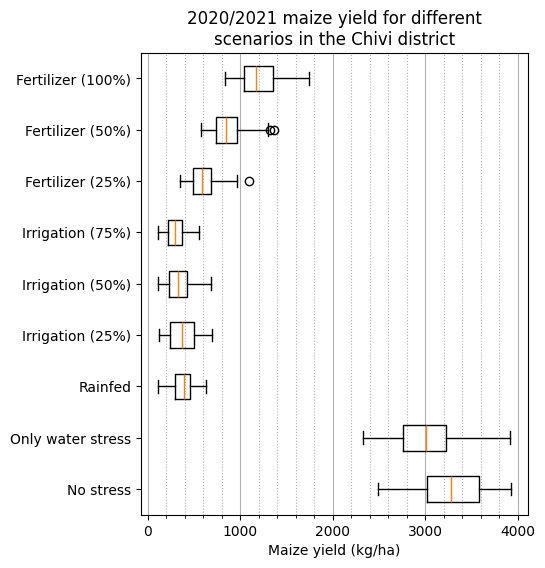

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(5, 6))
for n, (case, df) in enumerate(yield_results.items()):
    ax.boxplot(
        x=df.HARWT.astype(int),
        vert=False, positions=[n], widths=.5
    )
ax.set_yticklabels(yield_results.keys())
ax.set_xticks(np.arange(0, 4001, 1000), minor=False)
ax.grid(linestyle='-', which="major", axis="x")
ax.set_xticks(np.arange(0, 4001, 200), minor=True)
ax.grid(linestyle=':', which="minor", axis="x")
ax.set_xlabel("Maize yield (kg/ha)")
ax.set_title("2020/2021 maize yield for different\nscenarios in the Chivi district")
;